In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import cufflinks as cf
cf.set_config_file(offline=True)
cf.go_offline()
import datetime
from yahooquery import Ticker

In [2]:
ticker= ["ko","aapl","goog","tsla", "amzn","amc", "amtd"]
start_date ="2018-12-31"
end_date ="2022-01-31"
bis_week =int(input("Enter business week\n"))

Enter business week
52


In [3]:
def stock(ticker, start_date, end_date):
    '''The function that returns the stock in in a dataframe for any date range and the ticker
        It accept three argument which is the stock ticker, the start date and the end date
    '''
    stocks = yf.download(ticker, start=start_date, end =end_date)
    return stocks

stock_price = stock(ticker, start_date, end_date)


[*********************100%***********************]  7 of 7 completed


In [4]:
def adj_close(ticker, start_date, end_date):
    '''This function will return the adjusted close price of a stock
        It accept three argument which is the stock ticker, the start date and the end date
    '''
    stocks = yf.download(ticker, start=start_date, end =end_date)
    close = stocks.loc[:, 'Adj Close']
    norm = close.div(close.iloc[0])
    norm = norm.mul(100)
    return norm
new= adj_close(ticker, start_date, end_date)
new

[*********************100%***********************]  7 of 7 completed


,AAPL,AMC,AMTD,AMZN,GOOG,KO,TSLA
Date,,,,,,,
2018-12-31,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000
2019-01-02,100.114090,104.967434,NaN,102.474086,100.988788,99.113007,93.185097
2019-01-03,90.141994,106.351807,NaN,99.887485,98.112225,98.500521,90.252405
2019-01-04,93.990105,110.260600,NaN,104.888250,103.389304,100.464645,95.459736
2019-01-07,93.780882,114.983711,NaN,108.491517,103.165287,99.155241,100.649037
...,...,...,...,...,...,...,...
2022-01-24,422.175945,146.601514,NaN,192.472549,251.778177,139.374336,1397.235628
2022-01-25,417.369618,141.139207,NaN,186.403192,244.755265,139.048914,1379.807780
2022-01-26,417.134514,140.434384,NaN,184.920471,249.592036,138.537531,1408.368401


In [5]:
def adj_close_graph(ticker, start_date, end_date):
    '''This function prints the stocks projection
    It accept three argument which is the stock ticker, the start date and the end date
    It returns the visual representation of the stocks 
    '''
    adj_close_price_graph = adj_close(ticker, start_date, end_date).iplot()
    return adj_close_price_graph

adj_close_graph(ticker, start_date, end_date)

[*********************100%***********************]  7 of 7 completed


[*********************100%***********************]  7 of 7 completed


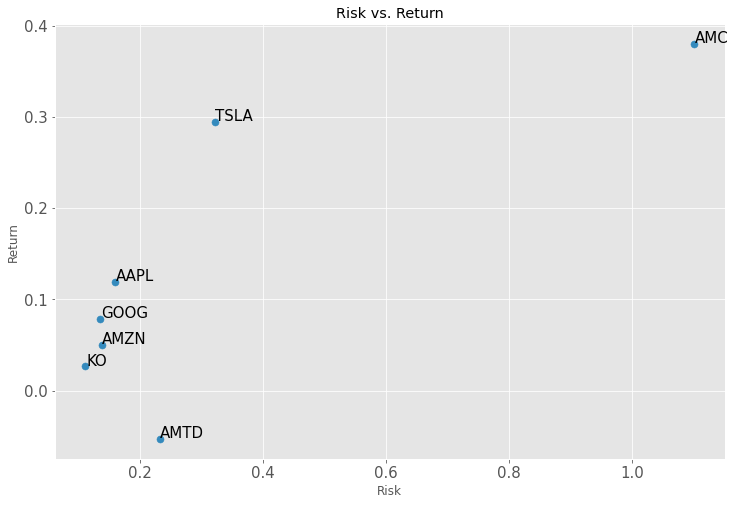

In [6]:
def return_on_invest(ticker, start_date, end_date, inv_date):
    '''This is the function that returns the investment on each stocks
    It accept three argument which is the stock ticker, the start date and the end date and number of business week in the year
    It returns the return on investment on each stock
    ''' 
    plt.style.use("ggplot")
    close = stock(ticker, start_date, end_date).copy()
    returns = close["Adj Close"].copy().pct_change().dropna()
    summary =returns.describe().T.loc[:,["mean","std"]]
    summary["mean"] = summary["mean"]* inv_date
    summary["std"] = summary["std"]* np.sqrt(inv_date)
    summary.plot(kind="scatter", x="std", y="mean", figsize=(12,8), s=50, fontsize=15)
    for i in summary.index:
        plt.annotate(i, xy=(summary.loc[i, "std"]+0.001, summary.loc[i, "mean"]+0.001), size=15)
    plt.xlabel("Risk")
    plt.ylabel("Return")
    plt.title("Risk vs. Return")
    return plt.show()

return_on_invest(ticker, start_date, end_date, bis_week) 

In [7]:
def crypto_currency(ticker, name):
    '''This a function for CryptoCurrency
    It accept two argument which is the crypto ticker, and crypto name
    '''
    crypto = yf.download(ticker.upper())
    name = name.title()
    btc_fig = cf.QuantFig(df=crypto)
    result = btc_fig.iplot(title=name, name="name")
    return result

crypto_currency("btc-usd","bitcoin")

[*********************100%***********************]  1 of 1 completed
